## L2D Assignment - Machine Learning 3:

This notebook contains your assignment questions for the **Refinement** lesson. Please attempt and complete all questions. The topics this assignment will assess are:

1. Refinement


When you have completed your assignment, please commit the changes to your GitHub repository's 'Assignments' folder, as instructed in the [Assignments section](https://learntodiscover.github.io/L2D-Handbook/section7.html) of the [L2D Handbook](https://learntodiscover.github.io/L2D-Handbook).


As a suggestion, take the [breast cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).

The breast cancer data can be imported from the `scikit-learn`.


In [1]:
# Identify all the functions needed in this task 

import numpy
from numpy import mgrid, linspace, c_, arange, mean, array
from numpy.random import uniform, seed
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, axes, scatter, xticks, show

from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import permutation_test_score, GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit

import pandas as pd 
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data set 

data = load_breast_cancer()

X = data.data
y = data.target

In [3]:
# Create a dictionary with the name "Classifiers" storing all the classifiers needed later in this task 

RANDOM_STATE = 111

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Random Forest)': AdaBoostClassifier(RandomForestClassifier(random_state=RANDOM_STATE)),
    'Extra Trees': ExtraTreesClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Extra Tree)': AdaBoostClassifier(ExtraTreesClassifier(random_state=RANDOM_STATE)),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'SVC (RBF)': SVC(random_state=RANDOM_STATE),
    'SVC (Linear)': LinearSVC(random_state=RANDOM_STATE, dual=False),
    'Multi-layer Perceptron': MLPClassifier(max_iter=5000, random_state=RANDOM_STATE)
    }

**Note**: Notice that the linear Support Vector classifier is imported with the keyword argument `dual=False`. This is to reduce the number of (pink) warnings that occur when the classifier struggles to find a good solution.


1. Using all features create a summary boxplot to see the medians and distributions of the features.

In [4]:
# Standardize the data, as the boxplot looks readily more readable and visually more clear with this step 

std_skl = StandardScaler()
some_data_normed = std_skl.fit_transform(X)

## WL: Standardizing not necessary at this step as raw data is needed for comparison

In [5]:
# Use Pandas DataFrame for later on easier data manipulation and plotting

plot = pd.DataFrame(some_data_normed, columns = data.feature_names)


/tmp/ipykernel_10452/3443388330.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot.values, vert = False, patch_artist = True, labels = plot.columns)


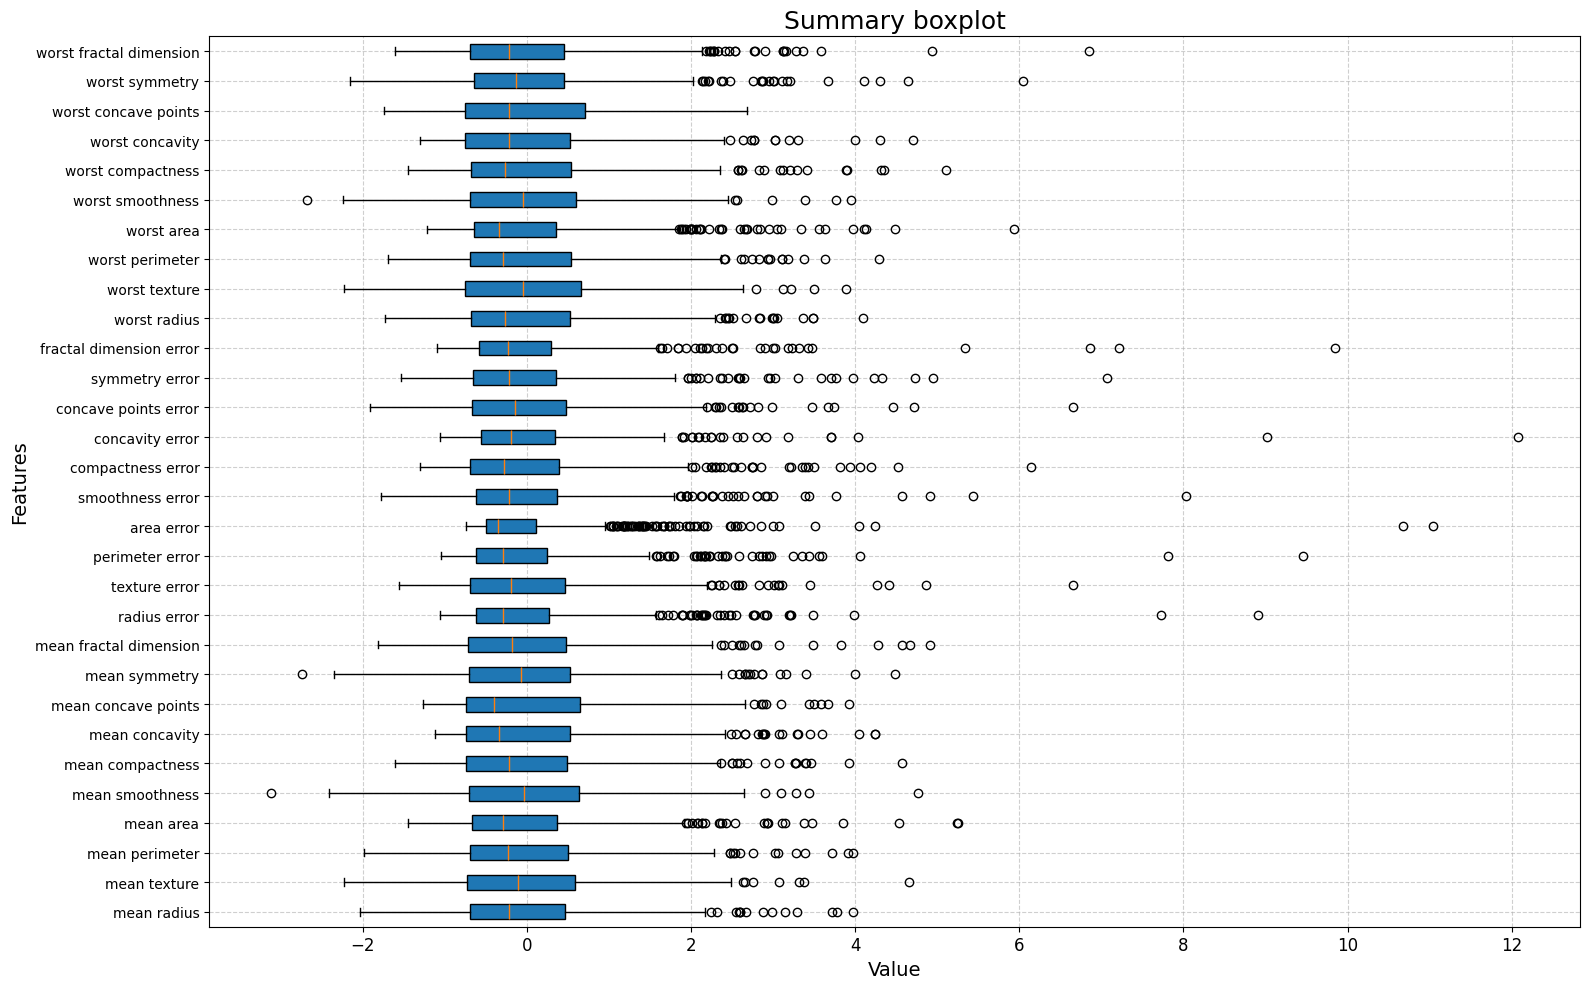

In [6]:
# Plot the boxplot 

plt.figure(figsize=(16,10))
plt.boxplot(plot.values, vert = False, patch_artist = True, labels = plot.columns)
plt.title("Summary boxplot", fontsize = 18)
plt.xlabel("Value", fontsize = 14)
plt.ylabel("Features", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

# WL: Correct import of DataFrame class from Pandas library. 
# WL: Correct conversion of NumPy array stored in X, into a Pandas DataFrame.
# WL: Correct use of .boxplot to create a boxplot from this DataFrame, to visualising and summarising the distribution of each feature.

2. Train the above introduced classifiers using the train_test split to generate testing and training data and pick a small training set of e.g. 10% to make the classification task difficult. Obtain the recall scores to compare classifiers.

In [7]:
# Using the "train_test_split" function, split the data into the testing and training sets

SEED_3 = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, 	
                            random_state=SEED_3, test_size=0.9)

X_train.shape, y_train.shape

# WL: Data correctly split into training and testing subsets.
# WL: Correct usage of the train_test_split function from scikit-learn. 
# WL: Correct use of keyowrd argument test_size to specify a small training set of 10%.

((56, 30), (56,))

In [8]:
# Visulay indicate that the training data set is 10%, and is smaller then the testing set 

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 56
Testing samples: 513


In [9]:
# Display the recall scores for the earlier identified classifiers 
# Create a "predictions" dictionary 

predictions={}
for name,clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    recall = recall_score(y_test, y_predict, average = 'binary')

    # Store the predicted results in the earlier created "predictions" dictionary, for later ease in the confusion matrix creation

    predictions[name] = y_predict
    print(f"{name} - Recall Score: {recall:.2f}")

# WL: Correct use of for loop to iterate through each of 8 classifiers. 
# WL: Correct training of model using the training data, using the .fit method.
# WL: Correct predictions made on test data using .predict method.
# WL: Correct scoring of model, using the .score method and recall_score function on test and predicted data.


Random Forest - Recall Score: 0.95
AdaBoost (Random Forest) - Recall Score: 0.97
Extra Trees - Recall Score: 0.98
AdaBoost (Extra Tree) - Recall Score: 0.96
Decision Tree - Recall Score: 0.85
SVC (RBF) - Recall Score: 0.98
SVC (Linear) - Recall Score: 0.92
Multi-layer Perceptron - Recall Score: 0.89


3. Plot the confusion matrix for each case.

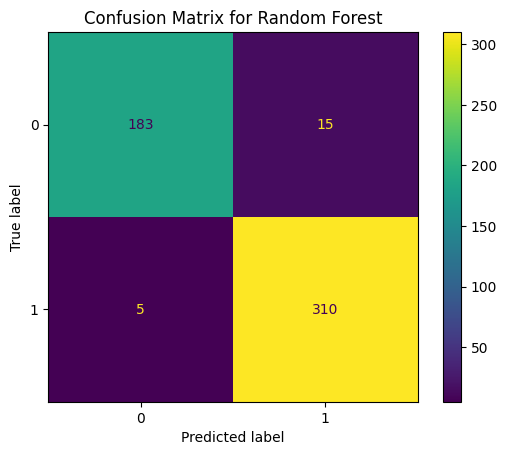

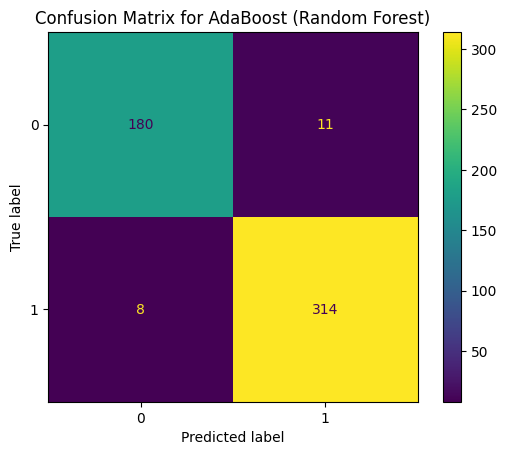

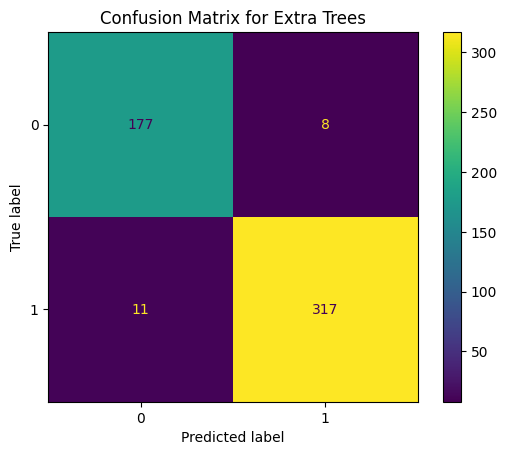

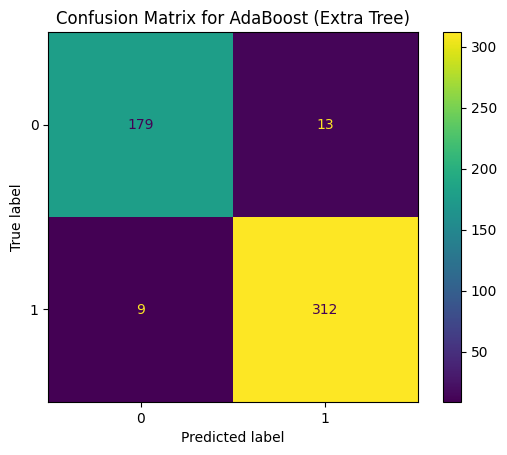

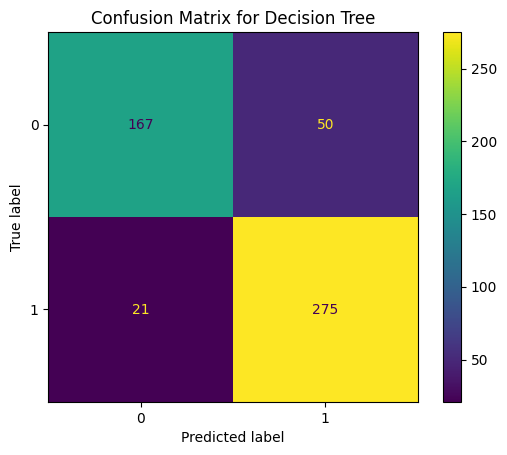

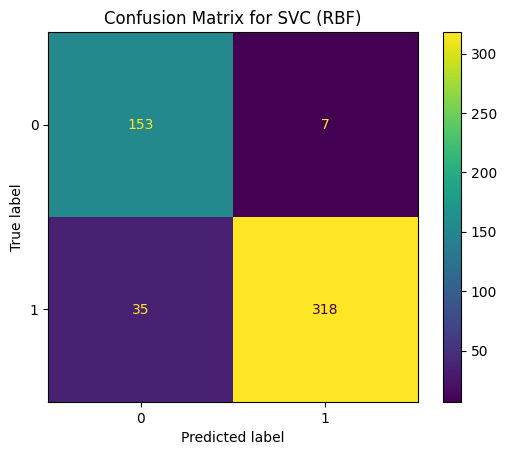

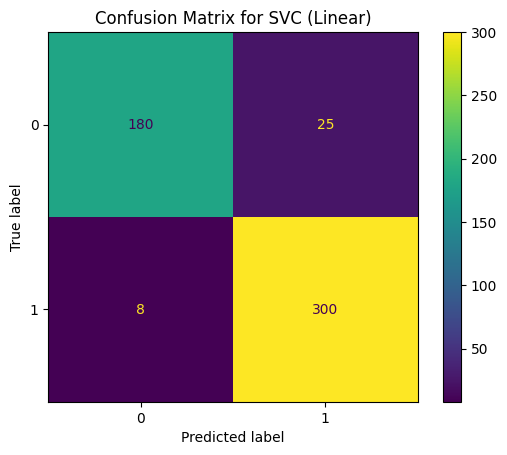

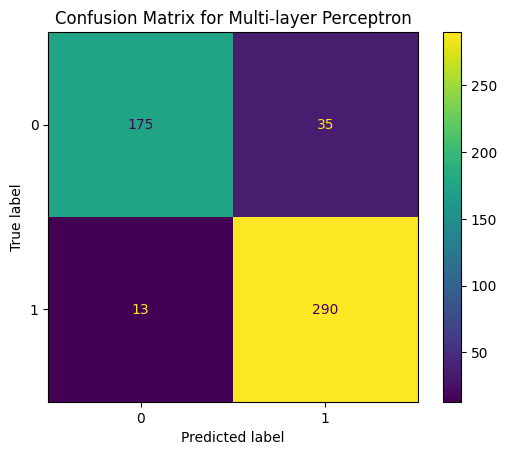

In [10]:
# For each classifier plot a confusion matrix 

for name,y_predict in predictions.items():
    confusion_mat = confusion_matrix(y_predict, y_test)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [0, 1])
    cm_display.plot()
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

# WL: Correct instantiation of class_names tuple, to contain binary labels for each dataset class, used for labelling axes.


4. Do a permutation test with default settings to get the p-values to reject the null hypothesis that the scores are compatible with random predictions. If it takes too long, reduce `n_permutations`.

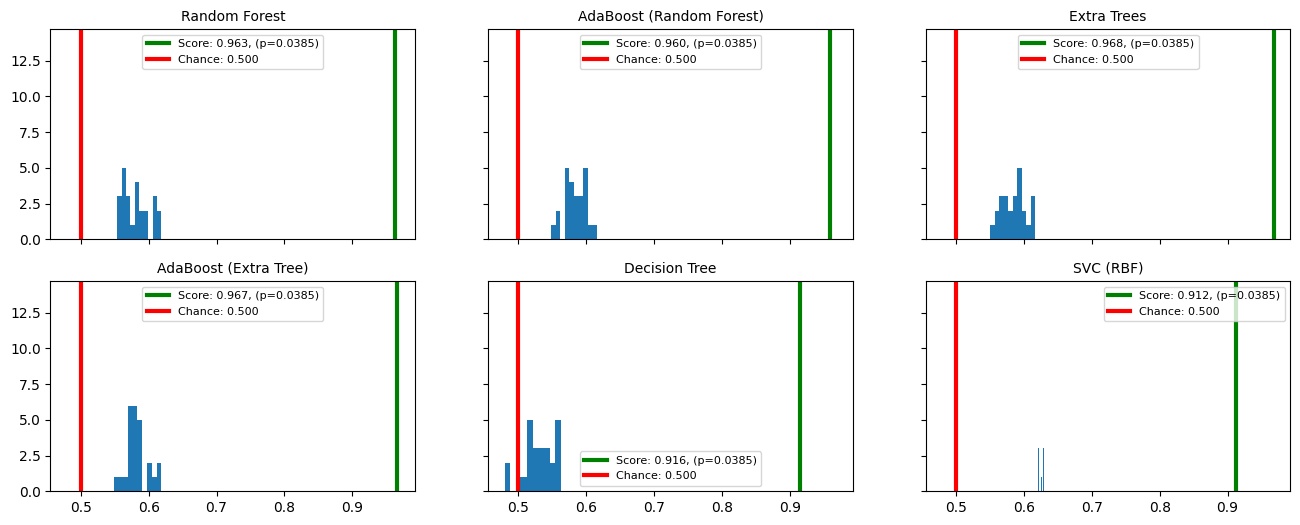

In [11]:
# Create a loop to show the permutation test score for each classifier in the earlier stored "classifier" dictionary 

n_classes = 2

chance = 1 / n_classes

fig, axes = subplots(figsize=[16, 6], ncols=3, nrows=2, sharey=True, sharex=True) 

for ax, (name, clf) in zip(axes.ravel(), classifiers.items()):

    score, permutation_scores, pvalue = permutation_test_score(clf, X, y, 
                                                               scoring="accuracy", 
                                                               n_jobs=-1,
                                                               n_permutations=25) 
    
    # Print the "score", "p - value ", and  "chance" scores for easier result interpretation & comparison      
                                        
    score_label = 'Score: {:.3f}, (p={:.4f})'.format(score, pvalue)
    chance_label = 'Chance: {:.3f}'.format(chance)

    # Display the results as histograms 

    ax.hist(permutation_scores) 
    ax.axvline(score,  c='g', label=score_label,  linewidth=3.0) 
    ax.axvline(chance, c='r', label=chance_label, linewidth=3.0)
    ax.set_title(name, fontsize=10) 
    ax.legend(fontsize=8);


5. Repeat the workflow with normalised data and compare the results.

In [12]:
# Using the "train_test_split" function, split the data into the testing and training sets

SEED_3 = 123

X_train, X_test, y_train, y_test = train_test_split(some_data_normed, y, 	
                            random_state=SEED_3, test_size=0.9)

X_train.shape, y_train.shape

((56, 30), (56,))

In [13]:
# Visulay indicate that the training data set is 10%, and is smaller then the testing set

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 56
Testing samples: 513


In [14]:
# Display the recall scores for the earlier identified classifiers 
# Create a "predictions" dictionary 

predictions={}
for name,clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    recall = recall_score(y_test, y_predict, average = 'binary')

    # Store the predicted results iin the earlier created "predictions" dictionary, for later ease in confusion matrix creation

    predictions[name] = y_predict
    print(f"{name} - Recall Score: {recall:.2f}")

Random Forest - Recall Score: 0.95
AdaBoost (Random Forest) - Recall Score: 0.96
Extra Trees - Recall Score: 0.98
AdaBoost (Extra Tree) - Recall Score: 0.97
Decision Tree - Recall Score: 0.85
SVC (RBF) - Recall Score: 0.98
SVC (Linear) - Recall Score: 0.91
Multi-layer Perceptron - Recall Score: 0.92


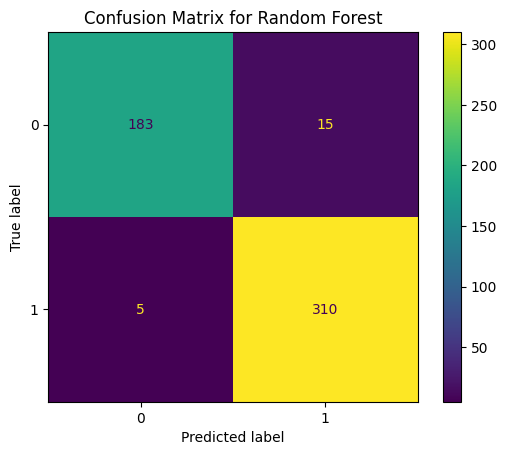

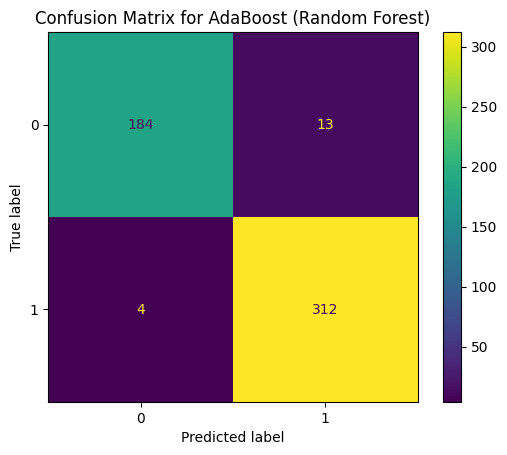

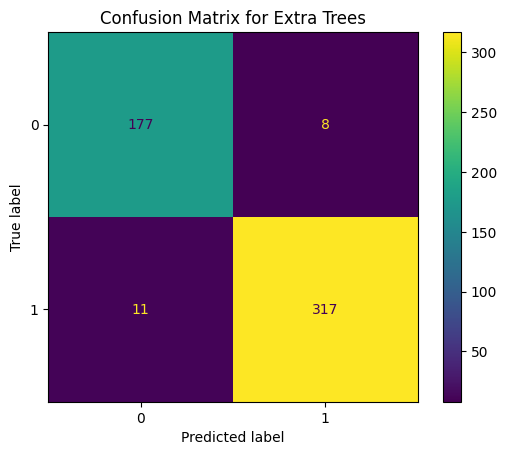

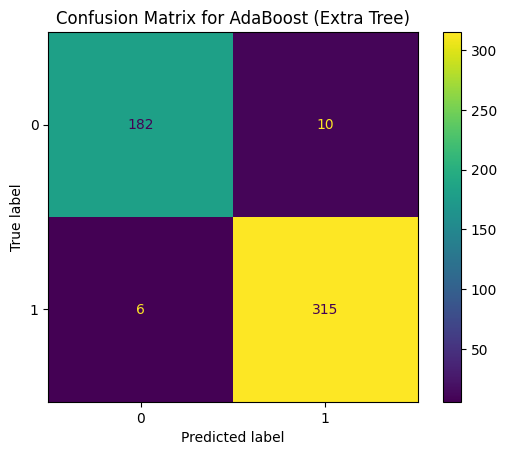

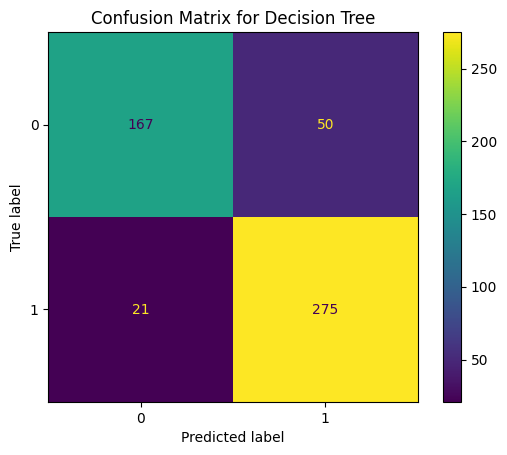

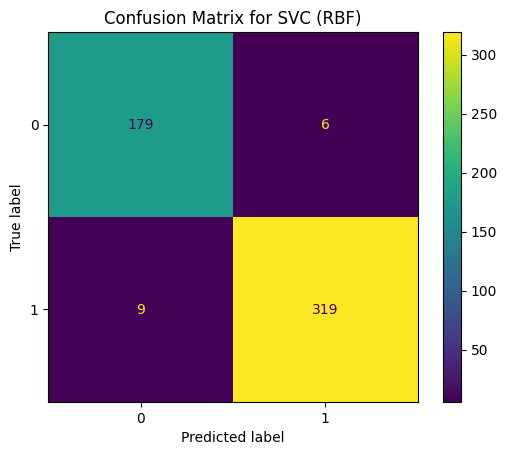

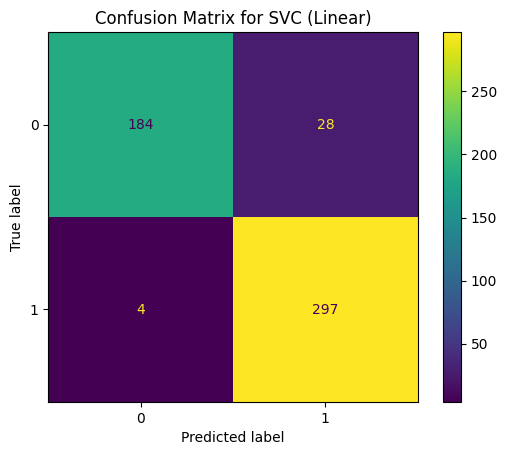

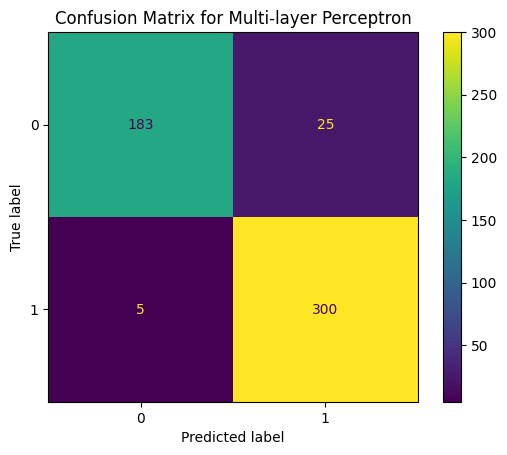

In [15]:
# For each classifier plot a confusion matrix 

for name,y_predict in predictions.items():
    confusion_mat = confusion_matrix(y_predict, y_test)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [0, 1])
    cm_display.plot()
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

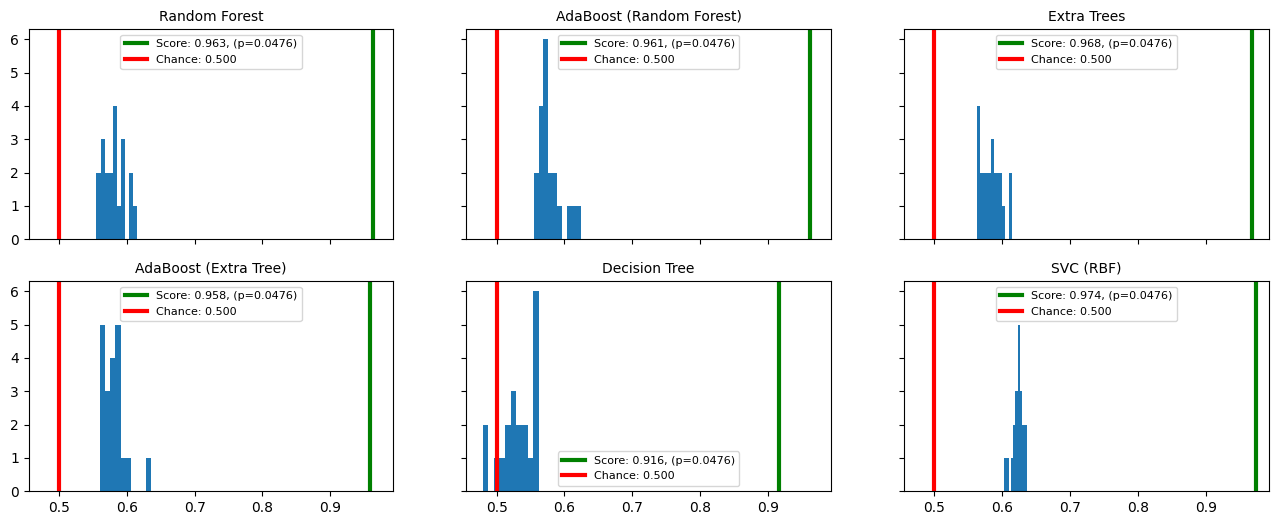

In [16]:
# Create a loop to show the permutation test score for each classifier in the earlier stored "classifier" dictionary 

n_classes = 2

chance = 1 / n_classes

fig, axes = subplots(figsize=[16, 6], ncols=3, nrows=2, sharey=True, sharex=True) 

for ax, (name, clf) in zip(axes.ravel(), classifiers.items()):

    score, permutation_scores, pvalue = permutation_test_score(clf, some_data_normed, y, 
                                                               scoring="accuracy", 
                                                               n_jobs=-1,
                                                               n_permutations=20) 

    # Print the "score", "p - value ", and  "chance" scores for easier result interpretation    
                                                            
    score_label = 'Score: {:.3f}, (p={:.4f})'.format(score, pvalue)
    chance_label = 'Chance: {:.3f}'.format(chance)

    # Display the results as histograms 
    
    ax.hist(permutation_scores) 
    ax.axvline(score,  c='g', label=score_label,  linewidth=3.0) 
    ax.axvline(chance, c='r', label=chance_label, linewidth=3.0)
    ax.set_title(name, fontsize=10) 
    ax.legend(fontsize=8);

# WL: Correct storage of class number into variable, and calculation of base level chance (level of random predictions) using these.
# WL: Correct use of subplots to create figure, using aforementioned specifics and keyword arguments.
# WL: Correct iteration through the classifiers.
# WL: Correct performance of the permutation test, using the permutation_test_score function from scikit-learn.
# WL: Correct preparation of labels, creating strings for classifier score, p-value and chance level.
# WL: Correct plotting of permutation test results as histograms, using matplotlib. 
# WL: Correct titles and legends added to figure. 
# WL: Correct use of show() function to display final figure. 

6. Perform a hyperparameter tuning with the Random Forest classifier. For the optimal parameter settings, re-run the training and plot the feature importances to see the contributions of each feature to the outcome.

In [17]:
# Create the "param_grid" dictionary, containing all the possible hyperparameter values for the Random Forest Classifier 

param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [18]:
# Using the previosly created "param_grid" dictionary, via "GridSearchCV" function, ideitify which parameters are the best for
# the Random Forest Classifier training

grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=25)


In [19]:
# Train the clasisfier based on those parameter features 

best_version = RandomForestClassifier(max_depth = 3, max_leaf_nodes = 6, random_state = 123)
best_version.fit(X_train, y_train) 

RandomForestClassifier(max_depth=3, max_leaf_nodes=6, random_state=123)

In [20]:
# Evaluet the performance of the re-trained classifier (use it for the comparison of the results)

y_pred = best_version.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classifiaction Report:\n", classification_report(y_test, y_pred))

# WL: Correct definition of parameter grid for hyperparameter tuning of the RandomForestClassifier.
# WL: Correct use of stratified cross-validation, with 10% training dataset size (90% test data size).
# WL: Correct shuffling of these for reproducibility, with use of keyword argument random_state for consistency. 
# WL: Correct use and initialisation of GridSearchCV, using a defined hyperparameter grid and stratified cross-validation.
# WL: Correct fitting of grid to the original (X, y) data to find best hyperparameters and accuracy scores.
# WL: Correct fitting grid to normalised data, in the same way. 
# WL: Thus, you have achieved an efficient comparison of scores and hyperparameters between both original and normalised data.

Accuracy: 0.9610136452241715
Classifiaction Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       188
           1       0.97      0.97      0.97       325

    accuracy                           0.96       513
   macro avg       0.96      0.96      0.96       513
weighted avg       0.96      0.96      0.96       513



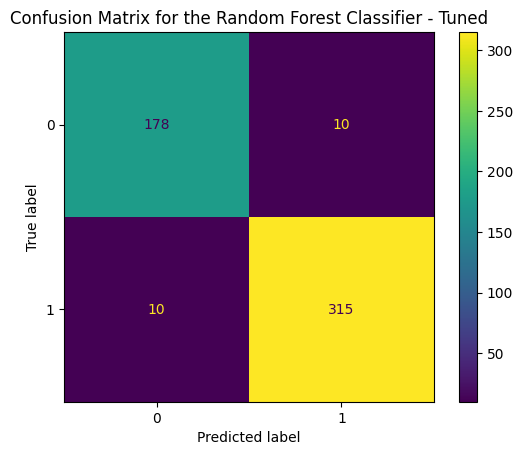

In [21]:
# Plot the confusion matrix for the re-trained classifier (use it for visual comparison of the results)

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot(cmap = "viridis")
plt.title(f"Confusion Matrix for the Random Forest Classifier - Tuned")
plt.show()

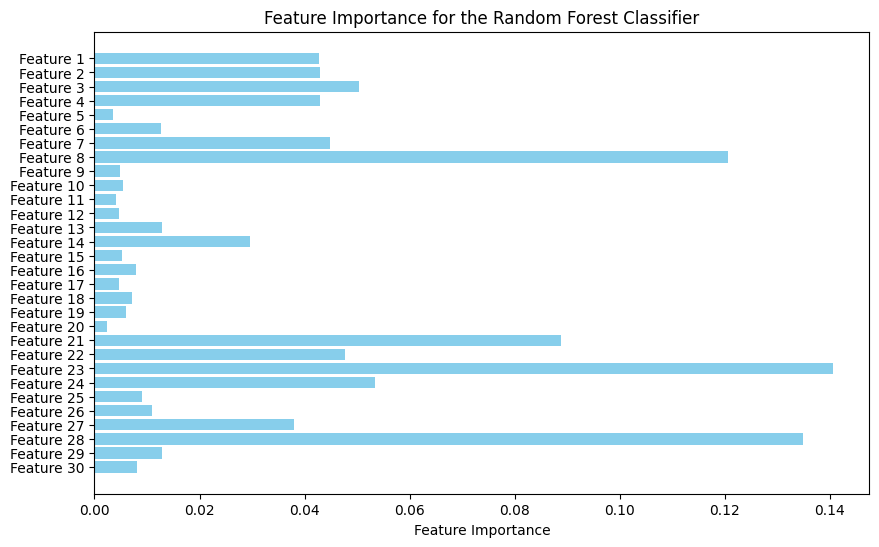

In [22]:
# Plot the feature importances to see the contributions of each feature to the outcome 

feature_importances = best_version.feature_importances_ 
feature_names = [f"Feature {i+1}" for i in range(len(feature_importances))]

plt.figure(figsize = (10,6))
plt. barh(feature_names, feature_importances, color = "skyblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance for the Random Forest Classifier")
plt.gca().invert_yaxis()
plt.show()

# WL: Feature importance scores correctly obtained from RandomForestClassifier.

In [ ]:
# WL: Overall a good assignment Would be great to show how training with raw vs normalized (which you have done in this case) data would affect the recal score. Otherwise, good job!